In [10]:
%pip install ipympl

In [11]:
import numpy as np
import pandas as pd

import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from tqdm import tqdm

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import mlab
import seaborn as sns

In [12]:
df = pd.read_csv('housingUnits.csv')

In [13]:
predictors = df.iloc[:,:-1]
label = df.iloc[:,-1:]

In [14]:
predictors

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,223,322,126,208.1300,1
1,21,7099,1338,2401,1138,207.5350,1
2,52,1467,328,496,177,181.4350,1
3,52,1274,293,558,219,141.0775,1
4,52,1627,357,565,259,96.1550,1
...,...,...,...,...,...,...,...
20635,25,1665,364,845,330,39.0075,4
20636,18,697,190,356,114,63.9200,4
20637,17,2254,469,1007,433,42.5000,4
20638,18,1860,399,741,349,46.6800,4


# Question 1
Why is it a good idea to standardize/normalize the predictor variables 2 and 3 and
why are predictor variables 4 and 5 probably not very useful by themselves to predict
median house values in a block?

## Answer:
Predictor variables 2 and 3 are shown below. Our model is attempting to predict median housing price in unites per **house**, while our current (untransformed) unit of analysis is in units of **blocks** of houses. This would not be useful in absolute terms of `total_rooms` or `total_bedrooms` per **block** of houses. 

To make use requires a dimensionless predictor representative of non-biased information for the number of `total_rooms`/`total_bedrooms` per house, which requires each `total_rooms` or `total_bedrooms` to be divided (normalized) by the number/proxy for number of houses in a block. To put it algebraically:

$$\frac{\{bedrooms,\:rooms\}\:per\:block}{houses\:per\:block}
\sim\frac{\{bedrooms,\:rooms\}\:per\:block}{\{population,\:households\}\:per\;block}$$

In [15]:
predictors.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.735271,1425.476744,499.539680,96.766775,2.965988
std,12.585558,2181.615252,391.392913,1132.462122,382.329753,47.495543,0.943948
min,1.000000,2.000000,65.000000,3.000000,1.000000,12.497500,0.000000
25%,18.000000,1447.750000,324.750000,787.000000,280.000000,64.085000,3.000000
50%,29.000000,2127.000000,446.000000,1166.000000,409.000000,88.370000,3.000000
75%,37.000000,3148.000000,630.000000,1725.000000,605.000000,118.581250,4.000000
max,52.000000,39320.000000,7119.000000,35682.000000,6082.000000,375.002500,4.000000


## Answer:
Predictor variables 4 and 5 are highly correlated as shown below. The reasoning is, the larger a `population` for a given block of measurement, the more households are attributable to that population and vice versa. Using both would then induce multicollinearity within the model, undermining the statistical significance.

In [16]:
corr = predictors[['population','households']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,population,households
population,1.0000000000,0.9072222661
households,0.9072222661,1.0000000000


Furthermore, as shown below, the $R^{2}$ is very small when each variable (4 or 5) is used as the predictor in a simple linear regression model predicting `median_house_value`. ($R^{2} = 0.0006$ for `population` and $R^{2} = 0.0043$ for `households`).

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


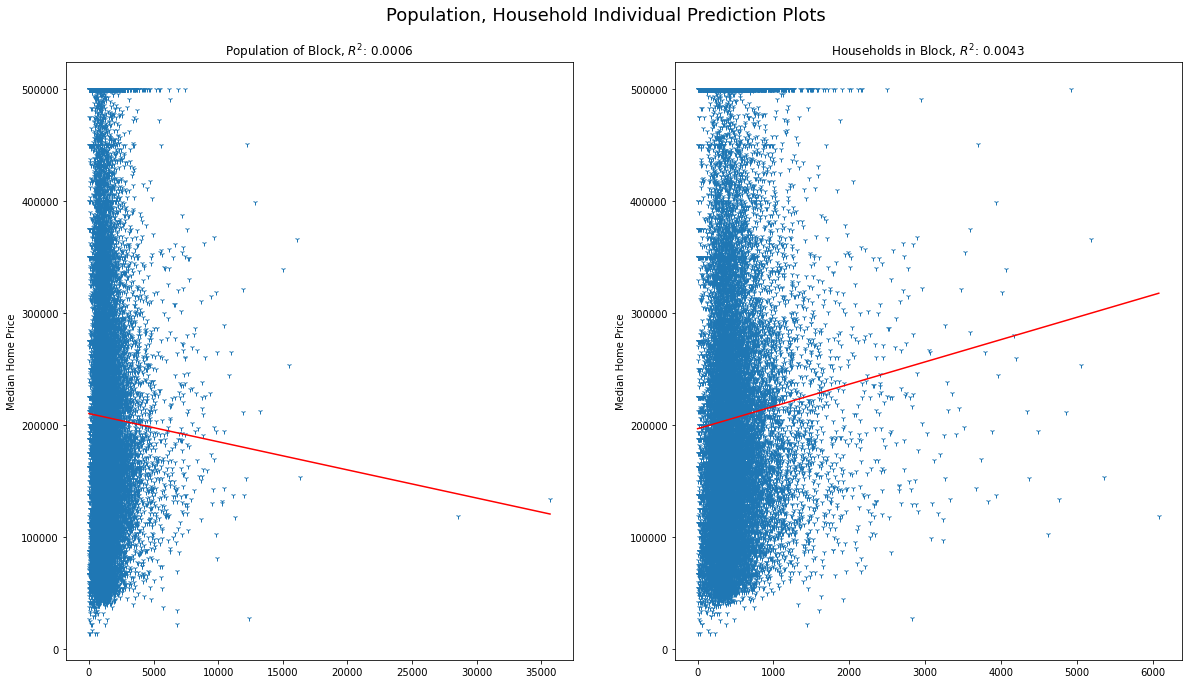

In [39]:
new_predictors = predictors[['population','households']]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,11))
fig.suptitle("Population, Household Individual Prediction Plots", fontsize=18, y=0.95)

title_map = {'population': 'Population of Block',
             'households': 'Households in Block'}

for pred, ax in zip(new_predictors, axs.ravel()):
  x = pd.DataFrame(new_predictors[pred], columns=[pred])
  y = label

  ols = LinearRegression().fit(x,y)

  x_lin = np.linspace(0, x.max(), 100)
  lin_pred = ols.predict(x_lin)

  ax.plot(x,y,'1')
  ax.plot(x_lin, lin_pred, color='red')

  ax.set_title(f'{title_map[pred]}, $R^{2}$: {ols.score(x,y):.4f}')
  # ax.set_xlabel(xlabel[pred])
  ax.set_ylabel('Median Home Price')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


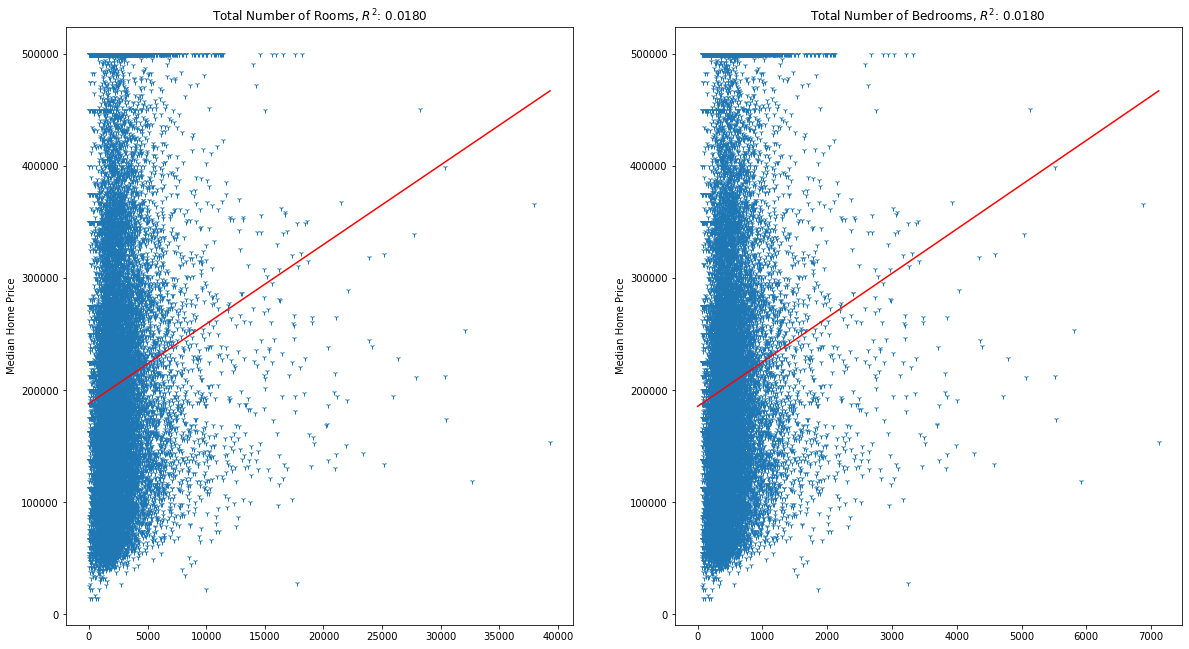

In [41]:
hello_predictors = predictors[['total_rooms','total_bedrooms']]

fig1, axs1 = plt.subplots(nrows=1, ncols=2, figsize=(20,11))
fig.suptitle("Total Rooms, Total Bedrooms", fontsize=18, y=0.95)

title_map = {'total_rooms': 'Total Number of Rooms',
             'total_bedrooms': 'Total Number of Bedrooms'}

for pred, ax in zip(hello_predictors, axs1.ravel()):
  x = pd.DataFrame(hello_predictors[pred], columns=[pred])
  y = label

  ols = LinearRegression().fit(x,y)

  x_lin = np.linspace(0, x.max(), 100)
  lin_pred = ols.predict(x_lin)

  ax.plot(x,y,'1')
  ax.plot(x_lin, lin_pred, color='red')

  ax.set_title(f'{title_map[pred]}, $R^{2}$: {ols.score(x,y):.4f}')
  # ax.set_xlabel(xlabel[pred])
  ax.set_ylabel('Median Home Price')

# Question 2:
To meaningfully use predictor variables 2 (number of rooms) and 3 (number of
bedrooms), you will need to standardize/normalize them. Using the data, is it better
to normalize them by population (4) or number of households (5)?

## Answer:
Through using emperical methods by running regressions using each `total_rooms` and `total_bedrooms` normalized with `population` and `households` separately, the $R^{2}$'s were compared. The logic is, the more correct predictor (assuming ceterus paribus of all other assumptions such as linearity) will result in higher $R^{2}$ scores.

In [19]:
total_rooms = df['total_rooms']
total_bedrooms = df['total_bedrooms']

population = df['population']
households = df['households']

pop_rooms, pop_bedrooms = pd.DataFrame(total_rooms.divide(population), columns=['pop_norm_rooms']), \
                          pd.DataFrame(total_bedrooms.divide(population), columns=['pop_norm_bedrooms'])
pop_norm = pd.concat([pop_rooms, pop_bedrooms], axis=1)
pop_norm.columns = ['pop_norm_rooms', 'pop_norm_bedrooms']

house_rooms, house_bedrooms = pd.DataFrame(total_rooms.divide(households), columns=['house_norm_rooms']), \
                              pd.DataFrame(total_bedrooms.divide(households), columns=['house_norm_bedrooms'])
house_norm = pd.concat([house_rooms, house_bedrooms], axis=1)
house_norm.columns = ['house_norm_rooms', 'house_norm_bedrooms']

model2_pop_norm = LinearRegression().fit(pop_norm, label)
model2_house_norm = LinearRegression().fit(house_norm, label)


model2_pop_norm_rooms = LinearRegression().fit(pop_rooms, label)
model2_pop_norm_bedrooms = LinearRegression().fit(pop_bedrooms, label)
model2_house_norm_rooms = LinearRegression().fit(house_rooms, label)
model2_house_norm_bedrooms = LinearRegression().fit(house_bedrooms, label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 0, 'Median Housing Price Per Block')

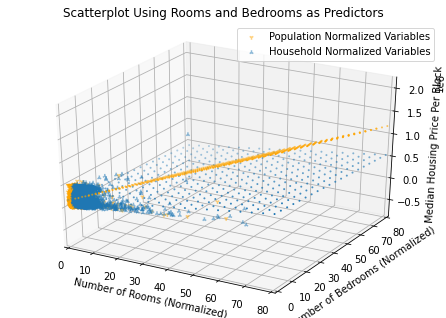

In [20]:
%matplotlib widget

x_max = 80
y_max = 80

fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)

x_pred = np.linspace(0, x_max, 20)
y_pred = np.linspace(0, y_max, 20)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

pop_pred = model2_pop_norm.predict(model_viz)
house_pred = model2_house_norm.predict(model_viz)

sc = ax.scatter(pop_norm['pop_norm_rooms'], 
                pop_norm['pop_norm_bedrooms'], 
                label,
                label='Population Normalized Variables',
                marker='1',
                color='orange',
                alpha=0.5)

sc = ax.scatter(house_norm['house_norm_rooms'], 
                house_norm['house_norm_bedrooms'], 
                label,
                label='Household Normalized Variables',
                marker='2',
                alpha=0.5)

ax.scatter(xx_pred.flatten(), yy_pred.flatten(), pop_pred, facecolor=(0,0,0,0), s=1, edgecolor='orange')
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), house_pred, facecolor=(0,0,0,0), s=1, edgecolor='#1f77b4')

ax.axis([0, x_max, 0, y_max])

ax.title.set_text('Scatterplot Using Rooms and Bedrooms as Predictors')
ax.legend(loc='best')
ax.set_xlabel('Number of Rooms (Normalized)')
ax.set_ylabel('Number of Bedrooms (Normalized)')
ax.set_zlabel('Median Housing Price Per Block')

In [21]:
%matplotlib inline

The $R^{2}$ explained using a model with two predictors, the `total_rooms` and the `total_bedrooms` will be shown first:

In [22]:
print(f'Score of model with the number of rooms and the number of bedrooms as predictors, normalized by population: {model2_pop_norm.score(pop_norm, label):.4f}')
print(f'Score of model with the number of rooms and the number of bedrooms as predictors, normalized by households: {model2_house_norm.score(house_norm, label):.4f}')

Score of model with the number of rooms and the number of bedrooms as predictors, normalized by population: 0.0447
Score of model with the number of rooms and the number of bedrooms as predictors, normalized by households: 0.0237


Next, we show the $R^{2}$ of the simple linear model with one predictor, each normalized by `population` and `households` separately:

In [23]:
print(f'Score of model with the number of rooms normalized by population as predictors: {model2_pop_norm_rooms.score(pop_rooms, label):.4f}')
print(f'Score of model with the number of rooms normalized by  households as predictors: {model2_house_norm_rooms.score(house_rooms, label):.4f}')
print(f'Score of model with the number of bedrooms normalized by population as predictors: {model2_pop_norm_bedrooms.score(pop_bedrooms, label):.4f}')
print(f'Score of model with the number of bedrooms normalized by households as predictors: {model2_house_norm_bedrooms.score(house_bedrooms, label):.4f}')

Score of model with the number of rooms normalized by population as predictors: 0.0439
Score of model with the number of rooms normalized by  households as predictors: 0.0231
Score of model with the number of bedrooms normalized by population as predictors: 0.0128
Score of model with the number of bedrooms normalized by households as predictors: 0.0034


For ever case shown previously, the $R^{2}$ of models normalized by `population` outperformed models normalized by `households`.

# Question 3

Which of the seven variables is most *and* least predictive of housing value, from a
simple linear regression perspective? [Hints: 
> a) Make sure to use the standardized/normalized variables from 2. above; 

> b) Make sure to inspect the scatter
plots and comment on a potential issue – would the best predictor be even more
predictive if not for an unfortunate limitation of the data?]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

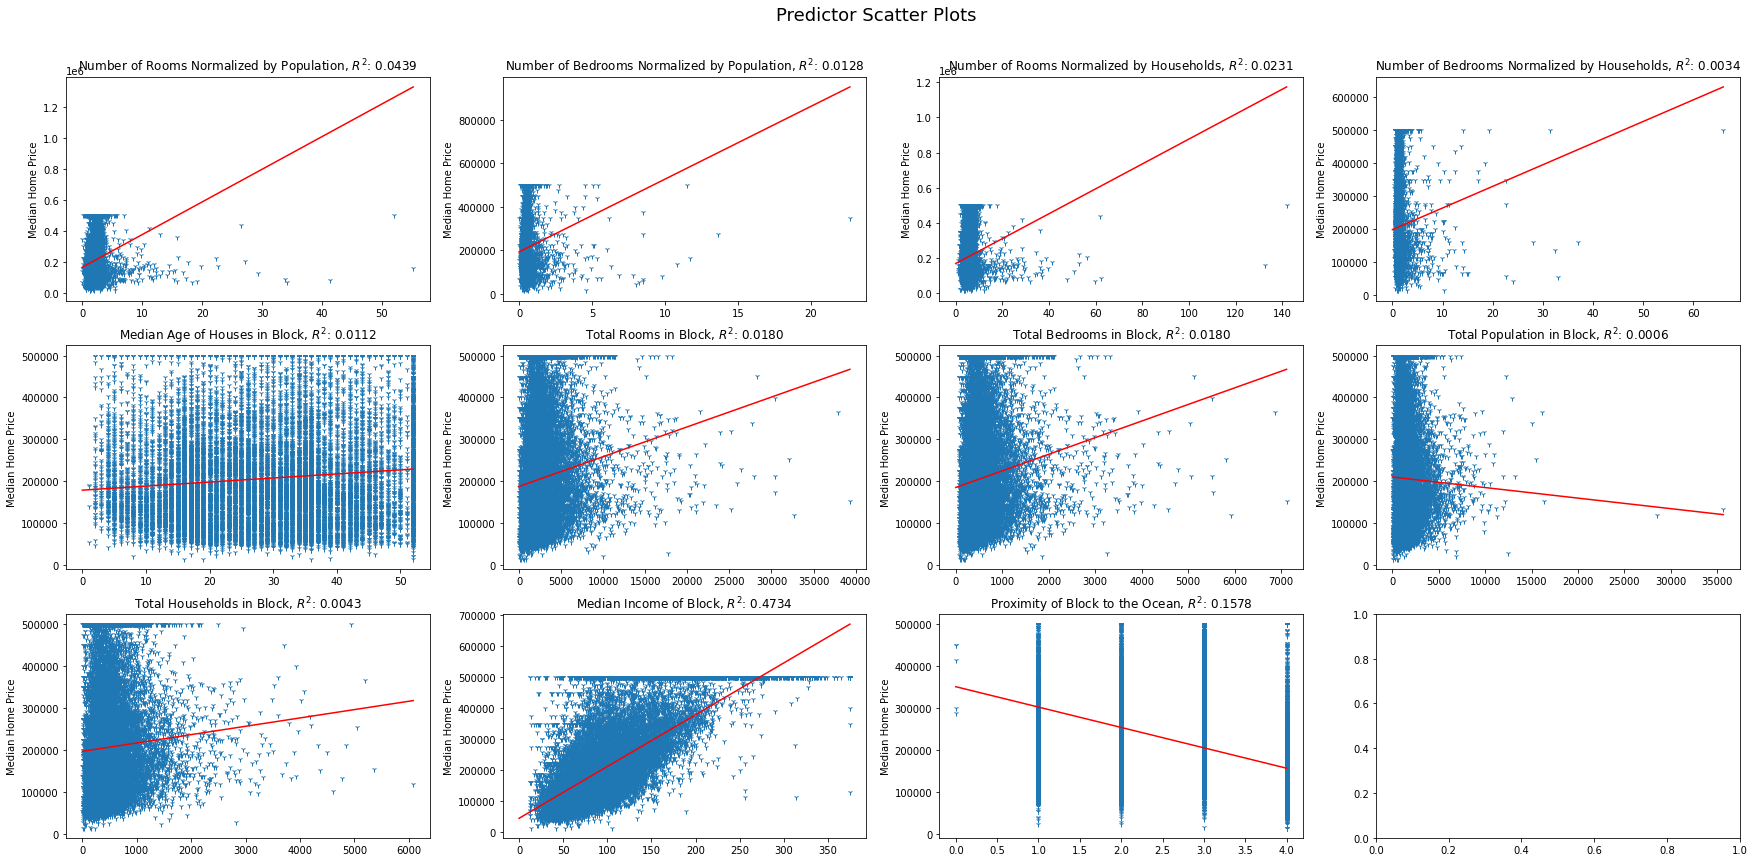

In [24]:
new_predictors = pd.concat([pop_rooms, pop_bedrooms, house_rooms, house_bedrooms, predictors], axis=1)

title = {'pop_norm_rooms': 'Number of Rooms Normalized by Population',
         'pop_norm_bedrooms': 'Number of Bedrooms Normalized by Population',
         'house_norm_rooms': 'Number of Rooms Normalized by Households',
         'house_norm_bedrooms': 'Number of Bedrooms Normalized by Households',
         'housing_median_age': 'Median Age of Houses in Block',
         'total_rooms': 'Total Rooms in Block',
         'total_bedrooms': 'Total Bedrooms in Block',
         'population': 'Total Population in Block',
         'households': 'Total Households in Block',
         'median_income': 'Median Income of Block',
         'ocean_proximity': 'Proximity of Block to the Ocean'}

xlabel = {'pop_norm_rooms': 'Number of Rooms in Block (Normalized by Population)',
          'pop_norm_bedrooms': 'Number of Bedrooms in Block (Normalized by Population)',
          'house_norm_rooms': 'Number of Rooms in Block (Normalized by Households)',
          'house_norm_bedrooms': 'Number of Bedrooms in Block (Normalized by Households)',
          'housing_median_age': 'Median Age of Houses in Block',
          'total_rooms': 'Total Rooms in Block',
          'total_bedrooms': 'Total Bedrooms in Block',
          'population': 'Total Population in Block',
          'households': 'Total Households in Block',
          'median_income': 'Median Income of Block (Thousands)',
          'ocean_proximity': 'Proximity of Block to the Ocean'}
          
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,14))
fig.suptitle("Predictor Scatter Plots", fontsize=18, y=0.95)

score = {}
model = {}
for pred, ax in zip(new_predictors, axs.ravel()):
  x = pd.DataFrame(new_predictors[pred], columns=[pred])
  y = label

  ols = LinearRegression().fit(x,y)
  model[pred] = ols

  x_lin = np.linspace(0, x.max(), 1000)
  lin_pred = ols.predict(x_lin)

  ax.plot(x,y,'1')
  ax.plot(x_lin, lin_pred, color='red')

  ax.set_title(f'{title[pred]}, $R^{2}$: {ols.score(x,y):.4f}')
  # ax.set_xlabel(xlabel[pred])
  ax.set_ylabel('Median Home Price')

## Answer:

Of the 7 variables discussed previously, the most predictive is "Median Income of Block," `median_income` and the least predictive is "Total Population in Block," `population`.

The evaluation metric used is the $R^{2}$ of the model, with the model using `median_income` having $R^{2} = 0.4734$ (highest) and the model using `population` having $R^{2} = 0.0006$ (lowest).

One potential issue affecting all models is the seemingly capped median home price of $\$500,000$, as:
> 1. it would be reasonable to assume that there would be some blocks with median prices $> \$500,000$

> 2. The unreasonable distribution of `median_house_value` as shown in the histogram below, skewed right and having a large number of units at the extreme, $\$500,000$ bin.

The predictor, `median_income` might show even more linearly predictive ability given the removal of the cap mentioned.


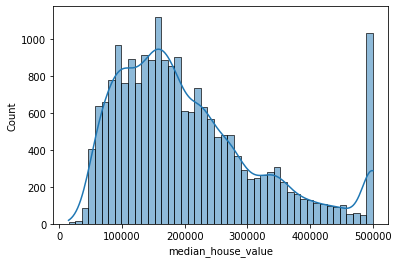

In [25]:
sns.histplot(df,
             x='median_house_value',
             kde=True)

# Question 4

Putting all predictors together in a multiple regression model – how well do these
predictors taken together predict housing value? How does this full model compare
to the model that just has the single best predictor from 3.?

In [26]:
X = pd.concat([pop_rooms, pop_bedrooms, predictors[['housing_median_age','population','households','median_income','ocean_proximity']]], axis=1)
y = label

model = LinearRegression().fit(X,y)
score = model.score(X,y)
print(f'The score of the model is: {score:.4f}')

The score of the model is: 0.6007


## Answer:

The $R^{2}$ of this model (considering all potential factors with `total_rooms` and `total_bedrooms` normalized by `population`) is $0.6007$, higher than the $0.4737$, achieved by using a simple linear regression with `median_income` as predictor.

Interpreted, this means that the multiple regression explains the variance exhibited in the labels $0.127$ more than the best simple linear regression using `median_income` as input.

# Question 5

Considering the relationship between the (standardized) variables 2 and 3, is there
potentially a concern regarding collinearity? Is there a similar concern regarding
variables 4 and 5, if you were to include them in the model?

Text(0.5, 1.05, 'Collinearity PairPlot')

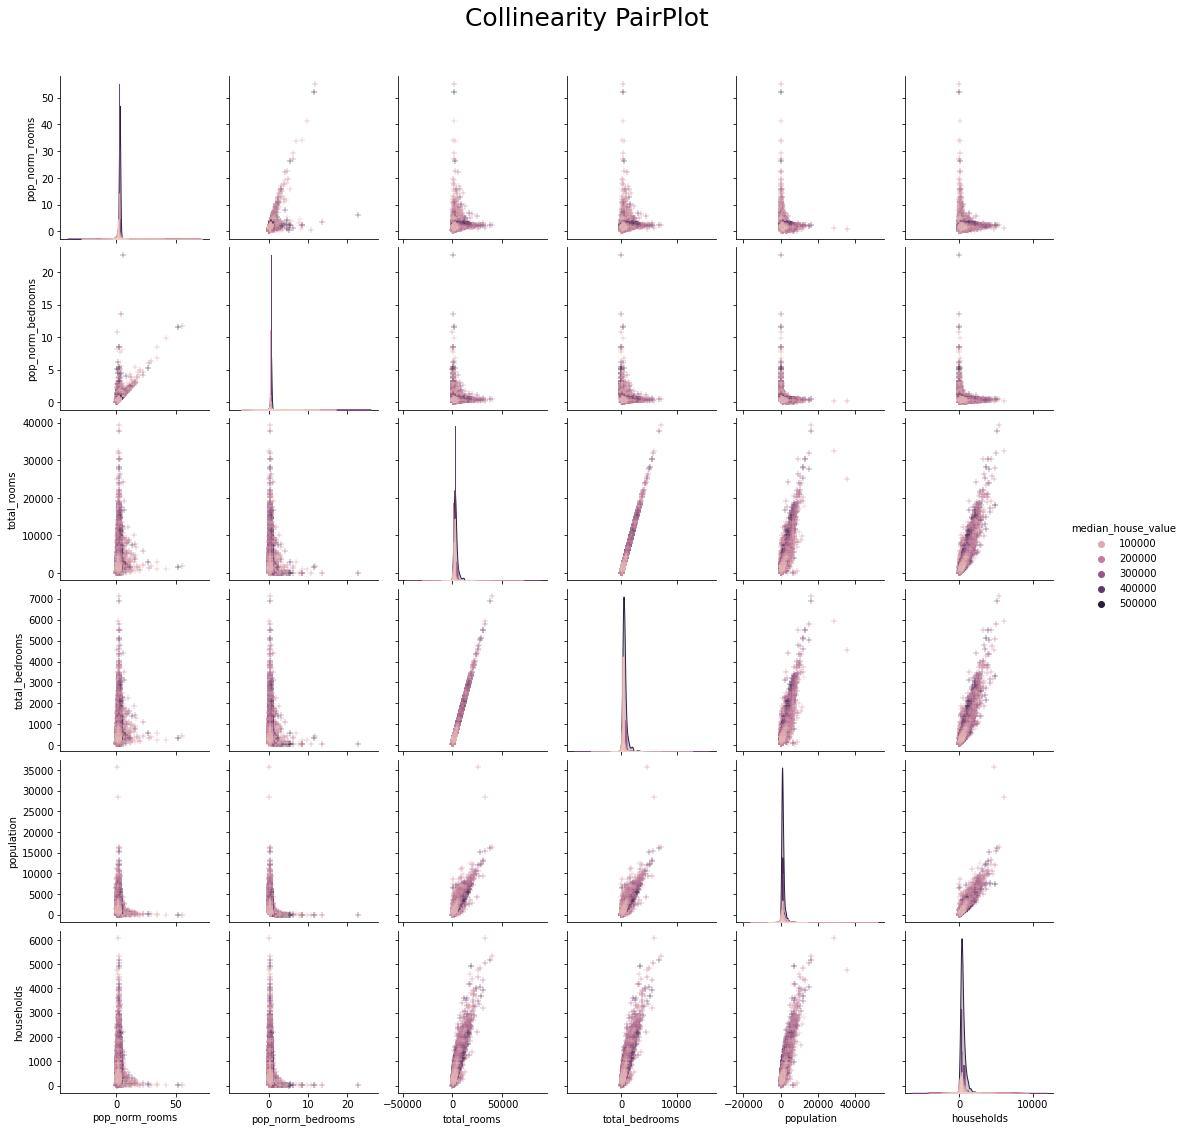

In [27]:
corr_rel = pd.concat([pop_norm,predictors[['total_rooms','total_bedrooms','population','households']],label], axis=1)
variables = corr_rel.iloc[:,:-1]

g = sns.pairplot(corr_rel,
                 vars=variables,
                 markers='+',
                 hue='median_house_value')

g.fig.suptitle('Collinearity PairPlot', fontsize=25, y=1.05)

In [28]:
corr5 = corr_rel.iloc[:,:-1].corr()
corr5.style.background_gradient(cmap='coolwarm').set_precision(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,pop_norm_rooms,pop_norm_bedrooms,total_rooms,total_bedrooms,population,households
pop_norm_rooms,1.0000000000,0.6414637002,0.1292735697,0.1292810551,-0.1405197840,-0.0284733934
pop_norm_bedrooms,0.6414637002,1.0000000000,-0.0619405376,-0.0619386232,-0.2196514351,-0.1601568404
total_rooms,0.1292735697,-0.0619405376,1.0000000000,0.9999997239,0.8571259729,0.9184844927
total_bedrooms,0.1292810551,-0.0619386232,0.9999997239,1.0000000000,0.8571176843,0.9184811413
population,-0.1405197840,-0.2196514351,0.8571259729,0.8571176843,1.0000000000,0.9072222661
households,-0.0284733934,-0.1601568404,0.9184844927,0.9184811413,0.9072222661,1.0000000000


## Answer:

Taking at the top-left diagonal correlation matrix between `pop_norm_rooms` and `pop_norm_bedrooms` (`corr_coef` = $0.6415$), as well as inspecting the PairPlot provided above, we can see a *moderate* amount of correlation between both normalized predictors. Eventually, we can use a kind of regularized regression (Ridge or LASSO) to reduce or completely remove a predictor.

For predictors 4 and 5, there would be more of a concern than exists for the aforementioned, normalized predictors. This is due to the fact that the two predictors, `population`, and `households` are visually and numerically much more correlated (`corr_coef` = $0.9072$) with each other than the normalized predictors.

# Question a

Does any of the variables (predictor or outcome) follow a distribution that can reasonably
be described as a normal distribution? 

## Answer:

Through simple inspection, we can see that the distribution most resembling a normal distribution is the median income of any given block: it is closest to a bell-shaped distribution without as much skew (still skewed rightwards a bit) compared to other distributions.

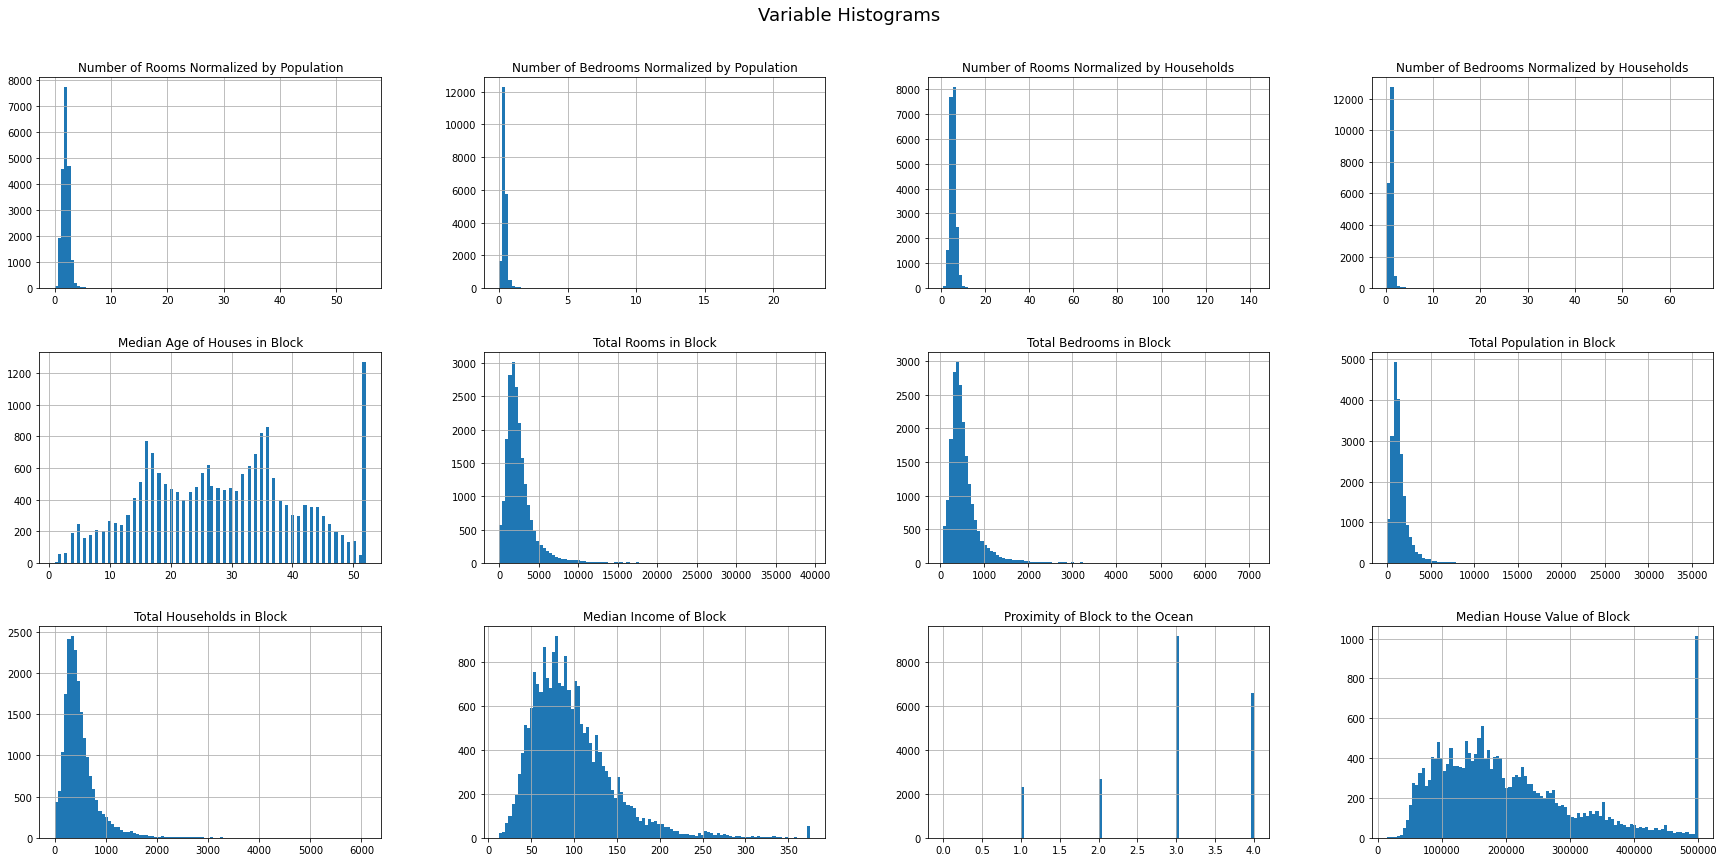

In [29]:
newnew_predictors = pd.concat([pop_rooms, pop_bedrooms, house_rooms, house_bedrooms, predictors, label], axis=1)

title_map = {'pop_norm_rooms': 'Number of Rooms Normalized by Population',
             'pop_norm_bedrooms': 'Number of Bedrooms Normalized by Population',
             'house_norm_rooms': 'Number of Rooms Normalized by Households',
             'house_norm_bedrooms': 'Number of Bedrooms Normalized by Households',
             'housing_median_age': 'Median Age of Houses in Block',
             'total_rooms': 'Total Rooms in Block',
             'total_bedrooms': 'Total Bedrooms in Block',
             'population': 'Total Population in Block',
             'households': 'Total Households in Block',
             'median_income': 'Median Income of Block',
             'ocean_proximity': 'Proximity of Block to the Ocean',
             'median_house_value': 'Median House Value of Block'}

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,14))
fig.suptitle("Variable Histograms", fontsize=18, y=0.95)

m = 0
for i in range(3):
    for j in range(4):
        newnew_predictors.hist(column = newnew_predictors.columns[m], bins = 100, ax=axs[i,j], figsize=(20, 18))
        axs[i,j].set_title(title_map[newnew_predictors.columns[m]])

        m += 1

# Question b

Examine the distribution of the outcome variable. Are there any characteristics of this
distribution that might limit the validity of the conclusions when answering the questions
above? If so, please comment on this characteristic. 

## Answer:

As mentioned previously in **Question 3**, the distribution of values for the `median_house_value` label rises sharply in count at $\$500,000$, making it seem very abnormal from a statistical distribution point-of-view. This suggests a hard-cutoff of measurement at $\$500,000$ for any given housing block, thus causing irregularities within any built model as the normality assumption is disturbed.

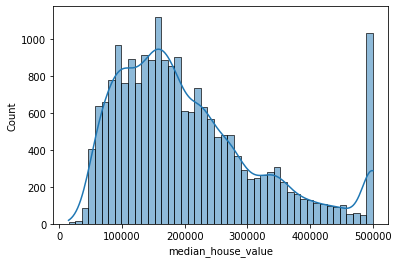

In [30]:
sns.histplot(df,
             x='median_house_value',
             kde=True)